# Log2 protein values, log2 rna-seq

# Notes
### http://www.stat.tamu.edu/~mjun/stat647_f12/f12_kriging.pdf
##### https://www.google.com/search?q=stat647+tamu&oq=stat647+tamu&aqs=chrome..69i57j69i60l2j0.3672j0j9&sourceid=chrome&ie=UTF-8
* We subtract the monthly average from the daily levels: we can
assume that the “filtered” ozone levels have mean zero and
concentrate on modeling the covariance structure
* In real analysis, we would model the mean structure and subtract the
estimated mean from the daily levels before modeling the covariance
structure
* Now when the mean is not zero (universal kriging):

    * Simple Kriging: when the mean is known or when the mean is zero
    * Ordinary Kriging: when the mean is an unknown constant
    * Universal Kriging: for more general m


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy.stats

In [3]:
%matplotlib inline

In [6]:
vsp_data = pd.read_csv('../Data/vsp_input.tsv',sep='\t')

In [7]:
vsp_data.head()

,Gene.names,Gene.description,AvgChrs,AT2_18M_F10,WSU_Old,Gene start (bp),Gene end (bp),gene length
0,0610037L13Rik,RIKEN cDNA 0610037L13 gene,3.689387,4.016506,23.808293,107889813,107899384,9571
1,1810009A15Rik,RIKEN cDNA 1810009A15 gene,18.144712,0.000000,23.182809,8888853,8890881,2028
2,2310011J03Rik,RIKEN cDNA 2310011J03 gene,9.614556,4.487340,23.487317,80318254,80320537,2283
3,2610301B20Rik,RIKEN cDNA 2610301B20 gene,3.069562,4.998258,17.000000,10874498,10899425,24927
4,2810006K23Rik,RIKEN cDNA 2810006K23 gene,4.818884,1.865742,17.000000,124328089,124341844,13755


In [8]:
chrm1_data_17 = vsp_data[vsp_data['AvgChrs']<=1]

#### Remove pseudovalues from protein data

In [9]:
chrm1_data=chrm1_data_17[chrm1_data_17['WSU_Old']!=17]

In [10]:
chrm1_data.head()

,Gene.names,Gene.description,AvgChrs,AT2_18M_F10,WSU_Old,Gene start (bp),Gene end (bp),gene length
46,Acadl,"acyl-Coenzyme A dehydrogenase, long-chain",0.341978,7.217256,28.021149,66830839,66863277,32438
53,Acbd3,acyl-Coenzyme A binding domain containing 3,0.924634,5.820596,24.807548,180726043,180754204,28161
88,Actr1b,"ARP1 actin-related protein 1B, centractin beta",0.187783,6.712477,25.467643,36698114,36714422,16308
90,Actr3,ARP3 actin-related protein 3,0.641597,7.504811,26.892912,125392905,125435727,42822
102,Adhfe1,"alcohol dehydrogenase, iron containing, 1",0.048929,2.993626,22.029780,9547948,9580673,32725


In [11]:
combined_mgi = pd.read_csv('../Data/mart_exports/PPG_WCP/combined_mgi.tsv',sep='\t',index_col=0)

In [12]:
combined_mgi.head()

,Gene start (bp),Gene end (bp),Chromosome/scaffold name,MGI symbol,Gene description
Gene stable ID,,,,,
ENSMUSG00000000001,108107280,108146146,3,Gnai3,guanine nucleotide binding protein (G protein)...
ENSMUSG00000000003,77837901,77853623,X,Pbsn,probasin [Source:MGI Symbol;Acc:MGI:1860484]
ENSMUSG00000000028,18780447,18811987,16,Cdc45,cell division cycle 45 [Source:MGI Symbol;Acc:...
ENSMUSG00000000031,142575529,142578143,7,H19,"H19, imprinted maternally expressed transcript..."
ENSMUSG00000000037,161117193,161258213,X,Scml2,Scm polycomb group protein like 2 [Source:MGI ...


# Plotting

### Visualizing Chromosome 1 RNA-seq values

Text(0.5, 0, 'Log2 Chrm1 RNA-seq Values')

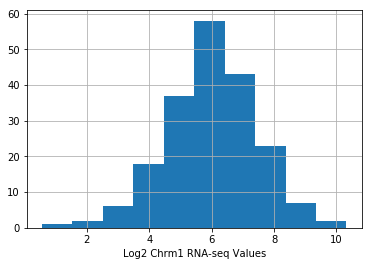

In [13]:
plt.figure()
hist = chrm1_data['AT2_18M_F10'].hist()
hist.set_xlabel('Log2 Chrm1 RNA-seq Values')

### Visualizing Chromosome 1 with and without 17 pseudovalues Proteome Values

Text(0.5, 0, 'Log2 Chrm1 Proteome')

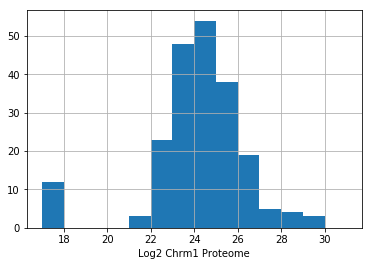

In [14]:
plt.figure()
hist = chrm1_data_17['WSU_Old'].hist(bins=range(17,32))
hist.set_xlabel('Log2 Chrm1 Proteome')

Text(0.5, 0, 'Log2 Chrm1 Proteome')

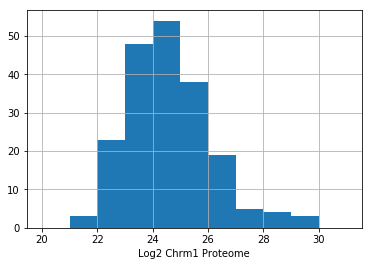

In [15]:
plt.figure()
hist = chrm1_data['WSU_Old'].hist(bins=range(20,32))
hist.set_xlabel('Log2 Chrm1 Proteome')

### Visualizing Chromosome 1 Gene Position

Text(0.5, 0, 'Normalized Gene position chrm 1')

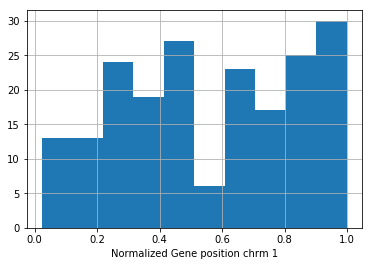

In [16]:
plt.figure()
hist = chrm1_data['AvgChrs'].hist()
hist.set_xlabel('Normalized Gene position chrm 1')

### Visualizing Chromosome 1 Gene Length

Text(0.5, 0, 'Gene Length')

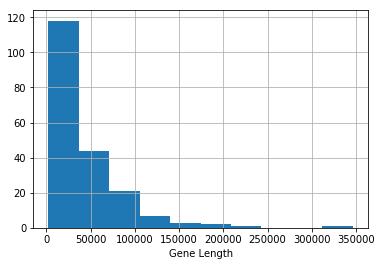

In [17]:
plt.figure()
hist = chrm1_data['gene length'].hist()
hist.set_xlabel('Gene Length')

### Log2 of gene length

Text(0.5, 0, 'Gene Length')

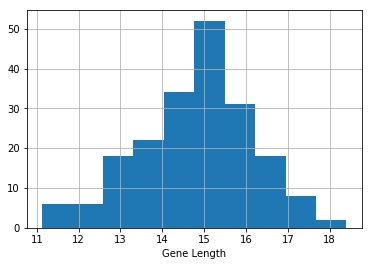

In [18]:
plt.figure()
hist = np.log2(chrm1_data['gene length']).hist()
hist.set_xlabel('Gene Length')

### Scatter plot of Chrm1 Proteome vs Transcriptome

In [19]:
chrm1_data.head()

,Gene.names,Gene.description,AvgChrs,AT2_18M_F10,WSU_Old,Gene start (bp),Gene end (bp),gene length
46,Acadl,"acyl-Coenzyme A dehydrogenase, long-chain",0.341978,7.217256,28.021149,66830839,66863277,32438
53,Acbd3,acyl-Coenzyme A binding domain containing 3,0.924634,5.820596,24.807548,180726043,180754204,28161
88,Actr1b,"ARP1 actin-related protein 1B, centractin beta",0.187783,6.712477,25.467643,36698114,36714422,16308
90,Actr3,ARP3 actin-related protein 3,0.641597,7.504811,26.892912,125392905,125435727,42822
102,Adhfe1,"alcohol dehydrogenase, iron containing, 1",0.048929,2.993626,22.029780,9547948,9580673,32725


Text(0, 10, 'Pearson r value 0.132, p-val 0.065')

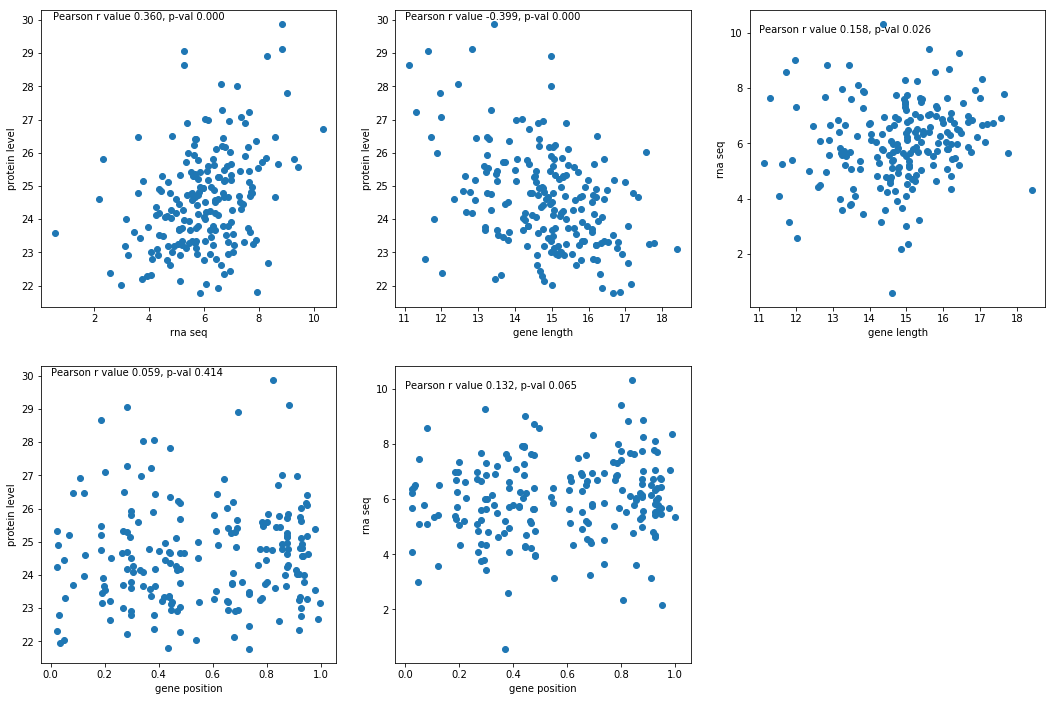

In [25]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches((18,12))
ax = fig.add_subplot(231)
ax.scatter(chrm1_data['AT2_18M_F10'],chrm1_data['WSU_Old'])
ax.set_xlabel("rna seq")
ax.set_ylabel("protein level")
pearsonr = scipy.stats.pearsonr(chrm1_data['AT2_18M_F10'],chrm1_data['WSU_Old'])
ax.text(0.5,30,f'Pearson r value {pearsonr[0]:.3f}, p-val {pearsonr[1]:.3f}')

ax2 = fig.add_subplot(232)
ax2.scatter(np.log2(chrm1_data['gene length']),chrm1_data['WSU_Old'])
ax2.set_xlabel("gene length")
ax2.set_ylabel("protein level")
pearsonr = scipy.stats.pearsonr(np.log2(chrm1_data['gene length']),chrm1_data['WSU_Old'])
ax2.text(11,30,f'Pearson r value {pearsonr[0]:.3f}, p-val {pearsonr[1]:.3f}')

ax3 = fig.add_subplot(233)
ax3.scatter(np.log2(chrm1_data['gene length']),chrm1_data['AT2_18M_F10'])
ax3.set_xlabel("gene length")
ax3.set_ylabel("rna seq")
pearsonr = scipy.stats.pearsonr(np.log2(chrm1_data['gene length']),chrm1_data['AT2_18M_F10'])
ax3.text(11,10,f'Pearson r value {pearsonr[0]:.3f}, p-val {pearsonr[1]:.3f}')

ax4 = fig.add_subplot(234)
ax4.scatter(chrm1_data['AvgChrs'],chrm1_data['WSU_Old'])
ax4.set_xlabel("gene position")
ax4.set_ylabel("protein level")
pearsonr = scipy.stats.pearsonr(chrm1_data['AvgChrs'],chrm1_data['WSU_Old'])
ax4.text(0,30,f'Pearson r value {pearsonr[0]:.3f}, p-val {pearsonr[1]:.3f}')

ax5 = fig.add_subplot(235)
ax5.scatter(chrm1_data['AvgChrs'],chrm1_data['AT2_18M_F10'])
ax5.set_xlabel("gene position")
ax5.set_ylabel("rna seq")
pearsonr = scipy.stats.pearsonr(chrm1_data['AvgChrs'],chrm1_data['AT2_18M_F10'])
ax5.text(0,10,f'Pearson r value {pearsonr[0]:.3f}, p-val {pearsonr[1]:.3f}')

In [72]:
%matplotlib widget

In [73]:
fig = plt.figure()
fig.set_size_inches(12,12)
ax = fig.add_subplot(111)
ax = Axes3D(fig)
ax.scatter(chrm1_data['AvgChrs'],chrm1_data['AT2_18M_F10'],chrm1_data['WSU_Old'],c=chrm1_data['WSU_Old'],cmap = cm.viridis)

FigureCanvasNbAgg()

### Avg chrm position

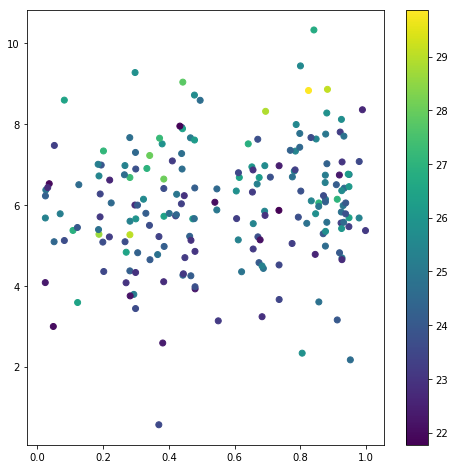

In [74]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)
sc = ax.scatter(chrm1_data['AvgChrs'],chrm1_data['AT2_18M_F10'],c=chrm1_data['WSU_Old'],cmap = cm.viridis)
plt.colorbar(sc)

### Gene length, log2 rna-seq, and log2 protein levels

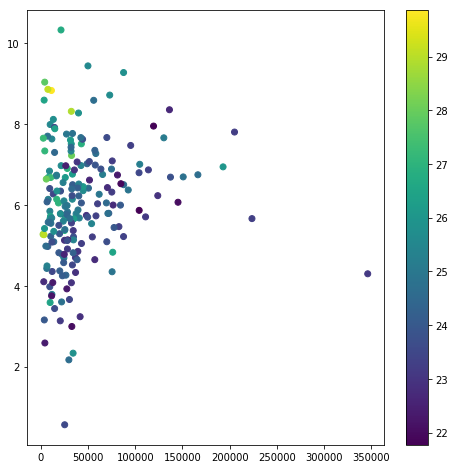

In [70]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)
sc = ax.scatter(chrm1_data['gene length'],chrm1_data['AT2_18M_F10'],c=chrm1_data['WSU_Old'],cmap = cm.viridis)
plt.colorbar(sc)

### Gene length, rna-seq, and protein levels all log2?

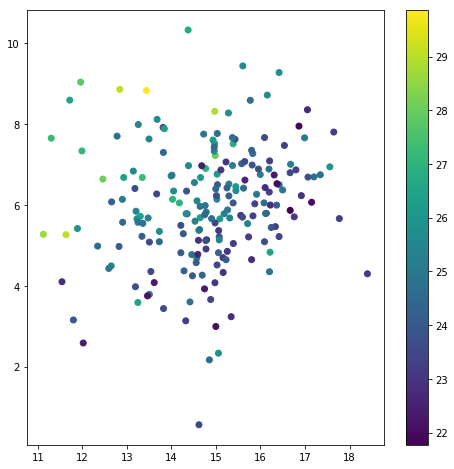

In [69]:
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)
sc = ax.scatter(np.log2(chrm1_data['gene length']),chrm1_data['AT2_18M_F10'],c=chrm1_data['WSU_Old'],cmap = cm.viridis)
plt.colorbar(sc)